In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Generating Trajectories of Random Walker Policy

In [2]:
def random_policy():
    k = np.random.rand()
    x_dir = math.cos(k * 2 * math.pi)
    y_dir = math.sin(k * 2 * math.pi)
    return np.array([x_dir, y_dir])

In [3]:
class TwoDimNavigation:
    def __init__(self):
        self.current_position = np.array([0.0, 0.0])
        self.magnitude = 2.0
        
    def state(self):
        return self.current_position
        
    def step(self, action):
        """
        action should be a 2 dimensional directional vector
        """
        length = math.sqrt(action[0] ** 2 + action[1] ** 2)
        step_direction = np.array([action[0] / length, action[1] / length])
        self.current_position += step_direction * self.magnitude
        return self.current_position
        
    def reset(self):
        self.current_position = np.array([0.0, 0.0])
        return self.current_position

In [11]:
max_iter = 100
sample_size = 100
env = TwoDimNavigation()
trajectories = []
trajectories_dataset = [] # for PCA

for i in range(max_iter):
    sample_trajectory = env.reset()
    sample_trajectory_dataset = env.reset()
    
    for t in range(sample_size):
        obs = env.state()
        sample_trajectory = np.vstack((sample_trajectory, obs))
        sample_trajectory_dataset = np.append(sample_trajectory_dataset, obs)
        
        env.step(random_policy())
        
    trajectories.append(sample_trajectory)
    trajectories_dataset.append(sample_trajectory_dataset)

In [13]:
print(trajectories[0][:5])
print(trajectories_dataset[0][:8])

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.38711838  1.9621772 ]
 [ 2.05592165  0.85986342]
 [ 1.92770871 -1.13602271]]
[0.         0.         0.         0.         0.38711838 1.9621772
 2.05592165 0.85986342]


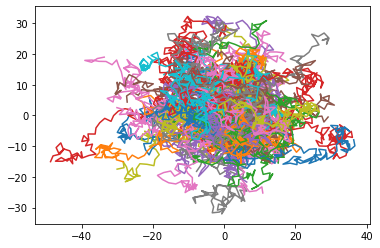

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(len(trajectories)):
    ax.plot(trajectories[i][:, 0], trajectories[i][:, 1])
plt.show()

## PCA on the Trajectories Dataset

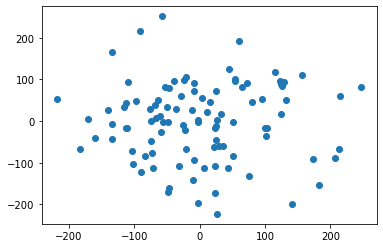

In [18]:
pca = PCA(n_components=2)
pca_eigenvectors = pca.fit_transform(trajectories_dataset)
plt.scatter(pca_eigenvectors[:, 0], pca_eigenvectors[:, 1])